In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
plt.style.use('./deeplearning.mplstyle')

In [31]:
# Using the same housing 
X_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

In [28]:
class GradientDescent():

    def __init__(self, X, y, lr=0.1):
        self.lr = lr
        self.X = X
        self.y = y
        self.m = X.shape[0]

    # Model representation
    def f(self, x, w, b):
        return w * x + b

    # Compute output prediction for each input sample, given some choice for w & b

    def compute_model_output(self, w, b):
        f_wb = np.zeros(self.m)

        for i in range(self.m):
            f_wb[i] = self.f(self.X[i], w, b)

        return f_wb


    def compute_cost(self, w, b):
        cost = (self.compute_model_output(w, b) - self.y)
        cost_sum = np.sum(cost**2)
        return (1 / (2 * self.m)) * cost_sum


    def cost_derivative_w(self, w, b):
        cost = (self.compute_model_output(w, b) - self.y)
        dj_dw = np.sum(cost * self.X)
        dj_dw = dj_dw * (1 / self.m)
        return dj_dw


    def cost_derivative_b(self, w, b):
        cost = (self.compute_model_output(w, b) - self.y)
        dj_db = np.sum(cost)
        dj_db = dj_db * (1 / self.m)
        return dj_db


    def update_weights(self, w, b):
        tmp_w = w - self.lr * self.cost_derivative_w(w, b)
        tmp_b = b - self.lr * self.cost_derivative_b(w, b)
        w = tmp_w
        b = tmp_b

        return w, b


    def run(self):
        w = random.randint(0, 500)
        b = random.randint(0, 500)

        cost = self.compute_cost(w, b)
        prev_cost = cost + 1

        while prev_cost > cost:
            prev_cost = cost
            print(f'Current cost = {prev_cost}')
            w, b = self.update_weights(w, b)
            cost = self.compute_cost(w, b)
            
        print(f'\nFinal cost = {prev_cost}')
        return w, b

In [32]:
gd = GradientDescent(X_train, y_train, lr=0.1)
w, b = gd.run()

print(f'Optimal Parameters: w = {w}, b = {b}')

Current cost = 5954.0
Current cost = 5705.3925
Current cost = 5552.441156249999
Current cost = 5441.47882340625
Current cost = 5349.309707147693
Current cost = 5265.902891574
Current cost = 5186.915307802345
Current cost = 5110.46138082912
Current cost = 5035.717396807757
Current cost = 4962.318536703366
Current cost = 4890.098370852389
Current cost = 4818.976309190949
Current cost = 4748.908973772952
Current cost = 4679.8691880831775
Current cost = 4611.836897842986
Current cost = 4544.795246683591
Current cost = 4478.72887893673
Current cost = 4413.623204646983
Current cost = 4349.464080324293
Current cost = 4286.237669336202
Current cost = 4223.930379935498
Current cost = 4162.528836853246
Current cost = 4102.019867417067
Current cost = 4042.390493968188
Current cost = 3983.6279290229204
Current cost = 3925.7195716424476
Current cost = 3868.653004347104
Current cost = 3812.4159902879255
Current cost = 3756.9964705510774
Current cost = 3702.382561541129
Current cost = 3648.5625524194

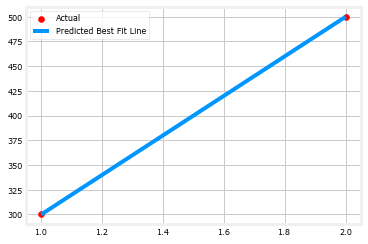

In [33]:
plt.scatter(X_train, y_train, c='r', label='Actual')
plt.plot(X_train, gd.compute_model_output(w, b), label='Predicted Best Fit Line')
plt.grid()
plt.legend()
plt.show()